<a href="https://colab.research.google.com/github/TtttttH/MLAI/blob/main/Lab3_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
spam_data = pd.read_csv('https://raw.githubusercontent.com/maalvarezl/MLAI/master/Labs/datasets/spambase.data', header=None)
spam_names_list = pd.read_csv('https://raw.githubusercontent.com/maalvarezl/MLAI/master/Labs/datasets/spambase.data.names', header=None)
number_names = np.shape(spam_names_list)[0]
spam_names = ['None']*number_names
for i in range(number_names):
    local = spam_names_list[0][i]
    colon_pos = local.find(':')
    spam_names[i] = local[:colon_pos]
spam_data.columns = spam_names
X = spam_data.iloc[:, 0:57]
y = spam_data.iloc[:, 57]

In [4]:
#Use the whole dataset to build a decision tree classifier

from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf = clf.fit(X, y)

In [8]:
import graphviz

#export the tree as a pdf file
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("spam")

'spam.pdf'

In [9]:
# render the graph inline
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=spam_names[0:57],
                                class_names=['ham', 'spam'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)

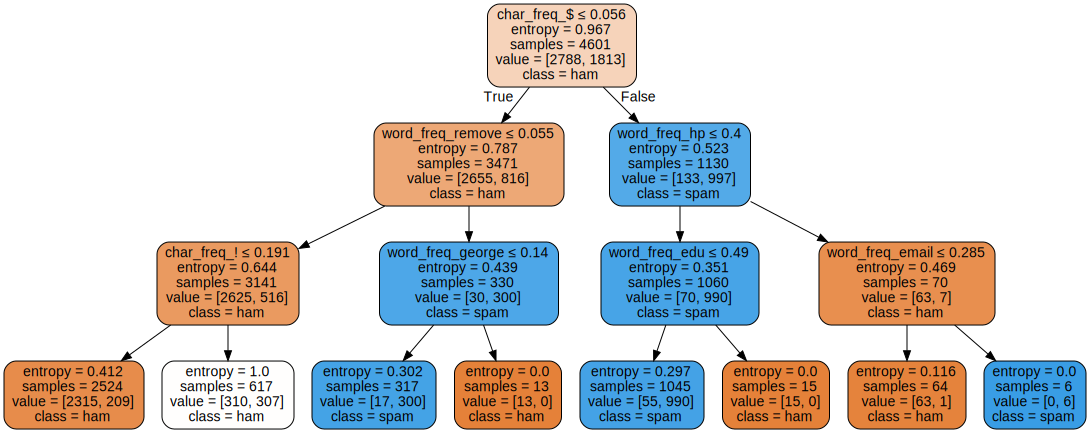

In [10]:
graph

In [42]:
#the hyparameters: the criterion or impurity measure(criterion)
#split the train_set and the test_set by crossvalidating
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=2, test_size=0.3, random_state=42)
indexes = list(ss.split(X, y))
train_set = indexes[0][0]
test_set = indexes[0][1]
Xtrain = X.iloc[train_set, :]
ytrain = y.iloc[train_set]
Xtest = X.iloc[test_set, :]
ytest = y.iloc[test_set]

In [20]:
Xtrain

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
958,0.00,0.00,0.00,0.0,0.00,0.00,1.21,0.00,0.0,1.21,0.00,1.21,1.21,0.00,0.00,1.21,0.00,0.00,4.87,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.676,15,57
1533,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,1.33,0.00,0.0,0.0,0.000,0.208,0.000,0.417,0.208,0.000,3.812,16,61
654,0.33,0.00,0.33,0.0,0.00,0.00,0.66,0.00,0.0,0.00,0.00,1.32,0.00,0.00,0.00,0.66,0.99,0.00,2.64,0.0,0.99,0.0,0.66,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.66,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.000,0.116,0.000,0.406,0.464,0.348,6.932,43,513
1497,0.52,1.31,0.26,0.0,2.90,0.26,0.79,0.26,0.0,0.79,1.05,1.58,0.79,0.00,0.00,0.00,0.00,1.31,3.16,0.0,0.79,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.000,0.138,0.000,0.046,0.000,0.000,2.934,60,135
3844,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,15.38,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,14.000,53,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.27,0.00,0.27,0.55,0.0,0.55,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.55,0.27,0.0,0.0,0.000,0.122,0.081,0.000,0.000,0.040,3.891,70,323
466,0.00,0.23,0.00,0.0,0.23,0.47,0.00,0.47,0.0,0.95,2.61,1.66,0.00,2.61,0.00,0.00,0.00,0.00,3.80,0.0,0.95,0.0,0.23,0.0,0.71,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.95,0.0,0.00,0.0,0.0,0.23,0.00,0.0,0.47,0.00,0.0,0.0,0.000,0.121,0.040,0.000,0.040,0.000,3.780,55,189
3092,0.00,0.00,0.00,0.0,1.49,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.49,0.0,0.00,0.0,0.00,0.0,4.47,2.98,0.0,1.49,0.0,0.00,0.0,0.0,0.00,0.0,1.49,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,1.49,0.00,0.0,0.0,0.000,0.229,0.000,0.000,0.000,0.000,2.333,10,49
3772,0.00,0.23,0.00,0.0,0.00,0.23,0.00,0.46,0.0,0.00,0.00,0.92,0.00,0.00,0.23,0.00,0.00,0.23,0.23,0.0,0.00,0.0,0.00,0.0,1.15,0.92,0.0,0.00,0.0,0.23,0.0,0.0,0.23,0.0,0.00,0.23,0.23,0.0,0.00,0.0,0.0,0.23,0.23,0.0,0.00,0.23,0.0,0.0,0.063,0.063,0.000,0.159,0.000,0.000,1.616,13,173


In [23]:
#Create a Grid search for the parameters criterion
# and max_depth and we use the training data to find the best parameters
from sklearn.model_selection import GridSearchCV
criterion_opts = np.array(['entropy', 'gini'])
max_depth_opts = [3, 5, 10, 15]
param_grid = dict(criterion = criterion_opts, max_depth = max_depth_opts)
cv = ShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, cv=cv, scoring='accuracy')
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=42, test_size=0.3, train_size=None),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs

In [25]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 15}

In [26]:
clf = tree.DecisionTreeClassifier(criterion=grid.best_params_["criterion"],max_depth=grid.best_params_["max_depth"])
clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)

In [27]:
#evaluate the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, ypred)
print(accuracy)

0.9109341057204924


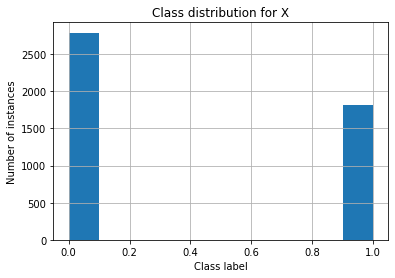

In [28]:
#distribution of the labels
%matplotlib inline
import matplotlib.pyplot as plt
y.hist()
plt.ylabel('Number of instances')
plt.xlabel('Class label')
plt.title('Class distribution for X')
plt.show()

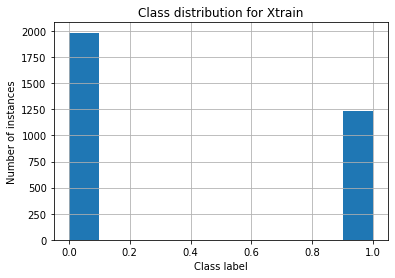

In [29]:
ytrain.hist()
plt.ylabel('Number of instances')
plt.xlabel('Class label')
plt.title('Class distribution for Xtrain')
plt.show()

Notice that the numbers of data observations per class are different. We usually refer to this kind of problems as "imbalanced"

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


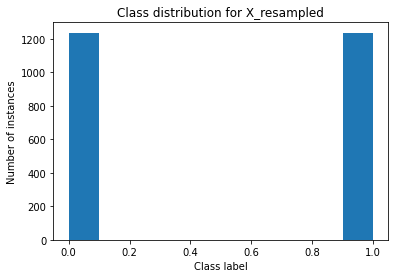

In [43]:
from imblearn.under_sampling import ClusterCentroids
import numpy as np
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(Xtrain, ytrain)
# Cluster centroids uses the kMeans algorithm to select a representative subset 
# of examples from the majority class, you can read more about it in the docs
# for the imblearn module. 
#recheck whether X_resampled, y_resampled are a balanced dataset
plt.hist(y_resampled)
plt.ylabel('Number of instances')
plt.xlabel('Class label')
plt.title('Class distribution for X_resampled')
plt.show()

In [44]:
# The resampled dataset now has same number of samples in both classes
# choose best parameters
criterion_opts_q1 = np.array(['entropy', 'gini'])
max_depth_opts_q1 = [3, 5, 10, 15]
param_grid_q1 = dict(criterion = criterion_opts_q1, max_depth = max_depth_opts_q1)
cv_q1 = ShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
grid_q1 = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid_q1,cv=cv_q1, scoring='accuracy')
grid_q1.fit(X_resampled, y_resampled)


GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=42, test_size=0.3, train_size=None),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs

In [46]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 15}

In [47]:
clf_q1 = tree.DecisionTreeClassifier(criterion='gini', max_depth=15)
clf_q1.fit(X_resampled, y_resampled)
ypred_q1 = clf_q1.predict(Xtest)

#check the accuracy
accuracy_q1 = accuracy_score(ytest, ypred_q1)
accuracy_q1

0.9080376538740044

In [48]:
#Using a performance measure:
from sklearn.metrics import classification_report
print('The performance for model in q1 in resampled dataset:')
print(classification_report(ytest,ypred_q1))
from sklearn.metrics import recall_score
print('The recall for model in q1 in resampled dataset:')
print(recall_score(ytest, ypred_q1))
print('The recall for model in original dataset:')
print(recall_score(ytest, ypred))

The performance for model in q1 in resampled dataset:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       804
           1       0.89      0.89      0.89       577

    accuracy                           0.91      1381
   macro avg       0.91      0.91      0.91      1381
weighted avg       0.91      0.91      0.91      1381

The recall for model in q1 in resampled dataset:
0.8925476603119584
The recall for model in original dataset:
0.878682842287695


In [3]:
##Decision trees for regression
import urllib.request
import pandas as pd
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv', './SeoulBikeData.csv')
bike_sharing_data = pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape')
bike_sharing_data = bike_sharing_data.drop('Date', axis=1)
# We transform the int64 variables in the dataset to float64.
for col in ['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)']:
    bike_sharing_data[col] = bike_sharing_data[col].astype('float64')

In [4]:
for col in ['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)']:
  bike_sharing_data[col] = bike_sharing_data[col].astype('float64')

In [5]:
from sklearn.model_selection import train_test_split
bs_train_set, bs_test_set = train_test_split(bike_sharing_data, test_size=0.15, random_state=42)

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

attributes_cat = ['Seasons', 'Holiday', 'Functioning Day']
attributes_num = ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', \
                  'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']   

full_transform = ColumnTransformer([
    ("num", StandardScaler(), attributes_num),
    ("cat", OneHotEncoder(), attributes_cat),
])

In [7]:
bs_train2_set, bs_val_set = train_test_split(bs_train_set, test_size=0.15,random_state=42)
bs_train2_set_attributes = bs_train2_set.drop('Rented Bike Count', axis=1)
bs_train2_set_labels = bs_train2_set['Rented Bike Count']
bs_val_set_attributes = bs_val_set.drop('Rented Bike Count', axis=1)
bs_val_set_labels = bs_val_set['Rented Bike Count']

In [8]:
# fit transform in the train set
bs_train2_set_attributes_transformed = full_transform.fit_transform(bs_train2_set_attributes)
# transform in the validation set
bs_val_set_attributes_transformed = full_transform.transform(bs_val_set_attributes)


In [9]:
#Since we want to perform a GridSearchCV on the same validation data that we used for Lab2
#we will use preDefinedSplit to tell the cross validator which instances to use for training
#and which ones for validation.
#We create first a test_fold array of the same dimensionality than the original training data
#and assign the value of -1 to the indexes corresponding to train instances and 0 to the indexes
#corresponding to validation instances. We will then stack the input attributes for both sets and also stack the labels.

In [10]:
from sklearn.model_selection import PredefinedSplit
import numpy as np
test_fold = np.zeros((np.shape(bs_train_set)[0], 1))
#train instances
test_fold[0:np.shape(bs_train2_set)[0]] = -1
#validation instances
ps = PredefinedSplit(test_fold)

whole_train_set_attributes = np.vstack((bs_train2_set_attributes_transformed, bs_val_set_attributes_transformed))
whole_train_set_labels = np.hstack((bs_train2_set_labels, bs_val_set_labels))

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree
max_depth_opts = [3, 5, 10, 15]
param_grid = dict(max_depth = max_depth_opts)
#neg_mean_squared_error is used to envaluate the scoring for regression tree
grid_regression = GridSearchCV(tree.DecisionTreeRegressor(), param_grid=param_grid, cv=ps, scoring='neg_mean_squared_error')
grid_regression.fit(whole_train_set_attributes, whole_train_set_labels)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 10, 15]}, pre_dispatch='2*n_jobs',
        

In [20]:
grid_regression.best_params_

{'max_depth': 10}

In [12]:
regr = tree.DecisionTreeRegressor(max_depth=10)
regr.fit(bs_train2_set_attributes_transformed, bs_train2_set_labels)
bs_val_set_predictions = regr.predict(bs_val_set_attributes_transformed)

In [13]:
#Compute the RMSE for the validation dataset
from sklearn.metrics import mean_squared_error
error_mod = np.sqrt(mean_squared_error(bs_val_set_labels, bs_val_set_predictions))
error_mod

274.586692496466

Question 2
Decision trees do not require any scaling of the features.Use the same splits of the data than before but use the numerical features as they come, this is , **do not use StandardScaler()** for the **numerical features**.What is the RMSE on the validation data?

In [24]:
q2_transform = ColumnTransformer([
    ("cat", OneHotEncoder(), attributes_cat),
], remainder = 'passthrough')

In [26]:
bs_train2_set_attributes_q2_transformed = q2_transform.fit_transform(bs_train2_set_attributes)

bs_val_set_attributes_q2_transformed = q2_transform.transform(bs_val_set_attributes)

In [28]:
from sklearn.model_selection import PredefinedSplit
test_fold_q2 = np.zeros((np.shape(bs_train_set)[0], 1))
test_fold[0:np.shape(bs_train2_set)[0]] = -1
ps = PredefinedSplit(test_fold)

In [30]:
whole_train_set_attributes_q2 = np.vstack((bs_train2_set_attributes_q2_transformed, bs_val_set_attributes_q2_transformed))
whole_train_set_labels_q2 = np.hstack((bs_train2_set_labels, bs_val_set_labels))

In [32]:
max_depth_opts = [3, 5, 10, 15]
param_grid_q2 = dict(max_depth = max_depth_opts)
#Exhaustive search over specified parameter values for an estimator.
grid_regression_q2 = GridSearchCV(tree.DecisionTreeRegressor(), param_grid=param_grid_q2, cv=ps, scoring='neg_mean_squared_error')
grid_regression_q2.fit(whole_train_set_attributes_q2, whole_train_set_labels_q2)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [3, 5, 10, 15]}, pre_dispatch='2*n_jobs',
        

In [33]:
grid_regression_q2.best_params_

{'max_depth': 10}

In [37]:
regr_q2 = tree.DecisionTreeRegressor(max_depth=grid_regression.best_params_["max_depth"], random_state=42)
regr_q2.fit(bs_train2_set_attributes_q2_transformed, bs_train2_set_labels)
bs_val_set_predictions_q2 = regr_q2.predict(bs_val_set_attributes_q2_transformed)

In [39]:
#Compute the RMSE for the validation dataset
error_mod = np.sqrt(mean_squared_error(bs_val_set_labels, bs_val_set_predictions_q2))
error_mod

281.28636247641964

In [31]:
#Random Forests
#Some parameters:
#1. n_estimators : total number of trees to train
#2. max_features : number of features to use as candidates for splitting at each tree node
#3. bootstrape: whether bootstrap samples are used when building trees. if False, the whole dataset is used to build each tree.(means that whether the samples can be repeated used)
#4. max_samples:If bootstrap is True, the number of samples to draw from X to train each base estimator. 

#Question 3

from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
q3_transform = ColumnTransformer([
    ("cat", OneHotEncoder(),attributes_cat),
], remainder='passthrough')

##fit transform on the train set
bs_train2_set_attributes_q3 = q3_transform.fit_transform(bs_train2_set_attributes)
##transform the validation set
bs_val_set_attributes_q3 = q3_transform.transform(bs_val_set_attributes)

whole_train_set_attributes_q3 = np.vstack((bs_train2_set_attributes_q3,bs_val_set_attributes_q3))
whole_train_set_labels_q3 = np.hstack((bs_train2_set_labels, bs_val_set_labels))

##Applying the Random Forest for regression and exploring different maximum depth options
#set those values for the parameters n_estimators and max_samples.
n_estimators_q3 = [20, 50, 100, 200]
max_samples_q3 = [500, 1000, 2000, 3000]
param_grid_q3 = dict(n_estimators = n_estimators_q3, max_samples = max_samples_q3)
grid_regression_q3 = GridSearchCV(RandomForestRegressor(), param_grid=param_grid_q3, cv=ps, scoring='neg_mean_squared_error')
#remember to fit the train dataset
grid_regression_q3.fit(whole_train_set_attributes_q3, whole_train_set_labels_q3)
##Training a RF using the best value for the n_estimators and max_samples
regr_Q3 = RandomForestRegressor(n_estimators = grid_regression_q3.best_params_["n_estimators"], max_samples=grid_regression_q3.best_params_["max_samples"])
regr_Q3.fit(bs_train2_set_attributes_q3, bs_train2_set_labels)
bs_val_set_predictions = regr_Q3.predict(bs_val_set_attributes_q3)

##compute the RSME for bs_val_set
from sklearn.metrics import mean_squared_error
error_q3 = np.sqrt(mean_squared_error(bs_val_set_predictions, bs_val_set_labels))
error_q3


231.12955905262388

In [32]:
grid_regression_q3.best_params_

{'max_samples': 3000, 'n_estimators': 50}

# Gradient Boosting
In Gradient Boosting or Gradient-boosted trees,each treein the ensemble is trained sequentially

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
q2_transform = ColumnTransformer([
                                  ("cat", OneHotEncoder(), attributes_cat),
],remainder='passthrough')

bs_train2_set_attributes_q4 = q2_transform.fit_transform(bs_train2_set_attributes)
bs_val_set_attributes_q4 = q2_transform.transform(bs_val_set_attributes)

whole_train_set_attributes_q4 = np.vstack((bs_train2_set_attributes_q4, bs_val_set_attributes_q4))
whole_train_set_labels_q4 = np.hstack((bs_train2_set_labels, bs_val_set_labels))

n_estimators_Q4 = [50, 100, 200, 500]
max_features_Q4 = [3, 5, 10, 15]
param_grid_q4 = dict(n_estimators = n_estimators_Q4, max_features = max_features_Q4)
grid_regression_q4 = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid_q4, cv=ps, scoring='neg_mean_squared_error')
grid_regression_q4.fit(whole_train_set_attributes_q4, whole_train_set_labels_q4)

regr_q4 = GradientBoostingRegressor(n_estimators = grid_regression_q4.best_params_["n_estimators"], max_features = grid_regression_q4.best_params_["max_features"])
regr_q4.fit(bs_train2_set_attributes_q4, bs_train2_set_labels)

bs_val_set_predictions_q4 = regr_q4.predict(bs_val_set_attributes_q4)
error_q4 = np.sqrt(mean_squared_error(bs_val_set_predictions, bs_val_set_labels))
print('The RMSE on the validation data is:', error_q4)

The RMSE on the validation data is: 231.12955905262388
